### Types of ML
There are several different type of machine learning. The easiest two understand as a beginner are:
1. supervised
    - data is labelled.
2. unsupervised
    - data is unlabelled.

### Data
All types of machine learning require data. That data is a numerical vector. **EVERYTHING** in ML are vectors/matrices. Inputs, outputs, weights, scores, gradients, losses, etc
* If the neural network is operating on images of handwitten digits which are of the size 28 x 28, then the input vector will be a single 784 length vector whose elements represent how dark each pixel is.
* If the neural network is operating on 8 movie scores, then the input vector is an 8 length input vector where each element is the rating of one movie

The more data you have, the better your NN will perform. Usually.
* The more examples of images of numbers you have, the better your NN will do.
* The more complex each training example is, the more likely you will overfit your NN to the training data.
    * Intuitively, if the data is unecessarily complex then the NN will make assumptions based on those properties that it shouldn't. If my images of handwritten digits also contain color, and 60% of the images of '4' are blue, then our NN will assume that the more blue an image is, the more likely it is a '4'
    * More complex data also means larger input vectors. If an image is 28 x 28 and there are 3 colors, then the input vector is of size 28 \* 28 \* 3. **The larger your input vector, the more likely you will overfit your data**. (**The more complex your data, the more likely you will overfit your data**.)


In [1]:
v = [1,2,3]
m = [[1,2,3],
     [4,5,6],
     [7,8,9]]

print(v)
print(m)

[1, 2, 3]
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


#### What is overfitting
An overfit neural network is one which does very well classifying data it was trained on, but does poorly on new data.  
* If our NN can classify with 99% accuracy an element of our training data set, but only performs with an accuracy of 50% on an image it has never seen, then our NN is overfit.
    ##### How to prevent overfitting
    We split our data set into two groups.
    1. Training
        * We train on this set (obviously). If our NN mistakes a '4' for an '8', then we change our NN to better classify this '4'.
    2. Testing
        * We **never** train on this set. If our NN mistakes a '4' for an '8', then we store that it got it wrong, and use this tally to calculate how well our NN did.
        * As we train our NN, we will test that our scores for the testing set are not going down. The testing scores going down signifies that we are overfitting.

Download the MNIST training set and testing set from [here](https://pjreddie.com/projects/mnist-in-csv/), and put the .csv in the same directory as this notebook.  
The MNIST dataset contains examples of handwritten digits.

In [2]:
import numpy as np
training_data_file_ref = open("./mnist_train.csv", 'r')
training_data_set = training_data_file_ref.readlines();
training_data_file_ref.close();

testing_data_file_ref = open("./mnist_test.csv", 'r')
testing_data_set = testing_data_file_ref.readlines();
testing_data_file_ref.close();

In [3]:
print(testing_data_set[0])

7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,0

In [5]:
for i, v in enumerate(training_data_set):
    training_data_set[i] = np.asfarray(training_data_set[i].split(',')) #every example in the training set is a huuuuge string. Split it on the commas
    
for i, v in enumerate(testing_data_set):
    testing_data_set[i] = np.asfarray(testing_data_set[i].split(','))    

In [13]:
training_example = training_data_set[8]
print("There are", len(training_data_set), "images")
print(training_example)

There are 60000 images
[   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    5.   63.  197.
    0.    0.    0.    0.    

Any element of the training_data_set array is a 785 length array, where the 0th element is the label and the other 784 elements are a flattened image of a handwritten digit.

1.0


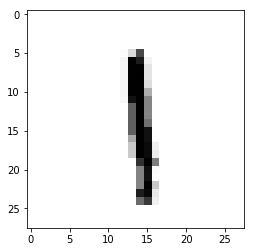

(28, 28)


In [14]:
import matplotlib.pyplot as plt
import numpy as np

label = training_example[0] #The first element is the label
training_example = training_example[1:].reshape((28,28)) #convert it to an array of floats of size 28 x 28

print(label)
plt.imshow(training_example, cmap='Greys')
plt.show()
print(training_example.shape)

Let's break down what our data set is:
* A file containing 60,000 lines
    * each line is a string
        * each string is one training example, 785 characters long
            * the first element of each training example is a label ('5', or '8', or some other label)
                * the rest of the of the training example is a vector 784 characters long
                     * each element of the vector represents the intensity of one pixel of a 28 x 28 image

## Neural Networks
A NN is a pattern recognition device. A NN is used when the pattern being recognized is too complex to accomplish with traditional algorithms.
* It trivial to recognize that 101 is 5 in binary. A NN is not necessary for this task.
* It is simple to recognize a single image of a '5' and differentiate it from other numbers. A NN is not necessary for this task.
* It is next to impossible to recognize thousands of images of '5's, and differentiate them from thousands of images of other numbers. A NN **is** necessary for this task.

The output of the NN will be a vector representation of the "confidence" that the NN thinks an image matches the labels.
* A NN which is 100% confident that it was given an image of '0' will output [1,0,0,0,0,0,0,0,0,0].
* A NN which is 100% confident that it was given an image of '4' will output [0,0,0,0,1,0,0,0,0,0].
* A NN which is 60% confident that it was given an image of '8', and 30% confident it was given an image of '1', and 10% confident that it was given an image of '3' will output [0, .3, 0, .1, 0, 0, 0, 0, .6, 0] 

**The output of a NN is a matrix of confidence scores.**

### A single Neuron
![Brain Neuron](imgs\neuron_med.jpeg)

A NN is a directed graph of neurons. A neuron is a node which has n inputs, 1 output, and some activation function.  
All n inputs come into the neuron. Each input is weighted by some quantity, w1, ..., wn.  The weighted sum is calculated and passed to some activation function. The output of the activation function is the output of the neuron.
![Single Neuron](imgs\neuron_1.jpg)

A 'vanilla' NN has 3 layers of neurons. The **input layer**, the **hidden layer**, and the **output layer**. Every neuron of the input layer is connected to every node of the hidden layer. Every node of the hidden layer is connected to every node of the output layer.

![Artificial Neural Network](imgs\ANN_1.png)

#### How it all relates to matrices (optional)
The weights can be represented as a matrix of weights  
[w11, w21, w31]  
[w12, w22, w32]  
[w13, w23, w33]  
where each wij is the weight from the ith node in the previous layer to the jth node in the current layer.  
If we multiply this weight matrix by the output of the previous layer, then apply the activation function to the resulting vector, we will have the output of the current layer.

In [17]:
w = np.matrix([[.2,.6,.3],[.4,.7,.9],[.2,.3,.8]]) # The weights of the connections from the previous layer to the current layer
i = np.matrix([.1,.8,.3]).T                 # The output of the previous layer, aka the input of the current layer
o = w.dot(i)# The product of these two matrices
print(o)

[[ 0.59]
 [ 0.87]
 [ 0.5 ]]


### Activation Function
The choice of activation function is very important. To mimick the way a neuron in the brain functions, we need something which is asymptotically limited to be between 0 and 1 for all inputs, and which will very quickly 'self-correct'. We will use the sigmoid function, which looks like this: 
![sigmoid function graph](imgs\sigmoid.png)

In [18]:
from scipy.special import expit
activated_o = expit(o)
print(activated_o)

[[ 0.64336515]
 [ 0.7047457 ]
 [ 0.62245933]]


The activated_o is the final outut of this fake layer. This column vector would then be passed as input to the next layer where the process repeats.

The number of inputs and outputs of a NN is evident in the problem. One of our images is a 784 length vector, therefore our NN will have 784 input neurons. The output of our NN is the classification of the image, i.e. '0', '1', ... '8', '9'.

## NN from scratch

In [19]:
class NeuralNetwork:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        self.input_to_hidden_weights = np.random.normal(0.0, pow(self.hidden_nodes, -0.5), (self.hidden_nodes, self.input_nodes))
        self.hidden_to_output_weights = np.random.normal(0.0, pow(self.output_nodes, -0.5), (self.output_nodes, self.hidden_nodes))
    
    def activate(self, x):
        return expit(x)
    
    def query(self, input_list):
        #convert input_list into a 2d array
        input = np.array(input_list, ndmin=2).T
        
        hidden_input_signal = np.dot(self.input_to_hidden_weights, input)
        hidden_output_signal = self.activate(hidden_input_signal)
        output_input_signal = np.dot(self.hidden_to_output_weights, hidden_output_signal)
        output_output_signal = self.activate(output_input_signal);
        
        return output_output_signal
        
    def shape(self):
        return [self.input_nodes, self.hidden_nodes, self.output_nodes];

In [23]:
num_input = 784
num_hidden = 100
num_output = 10

NN = NeuralNetwork(num_input, num_hidden, num_output);


training_example = training_data_set[0]
print("correct answer: ", training_example[0])
print(NN.query(training_example[1:]))
print("NN think: ", np.argmax(NN.query(training_example[1:])))

correct answer:  5.0
[[ 0.99234453]
 [ 0.15903878]
 [ 0.97029255]
 [ 0.77787415]
 [ 0.0501882 ]
 [ 0.03217523]
 [ 0.70407268]
 [ 0.09080229]
 [ 0.95743383]
 [ 0.92524327]]
NN think:  0


Our NN has given a score! It is entirely completely wrong, and isn't normalized to be percentages, but it queried and that's all that really matters. Our NN is so far entirely untrained.

### Training
Training a NN is it's own art, philosophy, field of science and religion. I will give the basics.

We must calculate how wrong we were.
* The correct classification for '5' is [0,0,0,0,0,1,0,0,0,0], but our NN was entirely wrong. It gave the above vector. We must calculate the distance between these vectors. This distance however only tells us how incorrect the final output layer was, it tells us nothing about the hidden layer and the weights to it.
    * We use **gradient descent** to attribute the responsibility of the final scores to each weight in the network
        * If a weight is very high, like .8, and our output is very wrong, then we need to change the weight .8 much more than a very small weight.
    * Once we have attributed responsibilit to certain weights, we perform **back propagation** to go backwards through the network and update the weights

In [24]:
class NeuralNetwork2:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        self.learning_rate = learning_rate
        
        self.input_to_hidden_weights = np.random.normal(0.0, pow(self.hidden_nodes, -0.5), (self.hidden_nodes, self.input_nodes))
        self.hidden_to_output_weights = np.random.normal(0.0, pow(self.output_nodes, -0.5), (self.output_nodes, self.hidden_nodes))
    
    def activate(self, x):
        return expit(x)

    def train(self, input_list, target_list):
        #convert input_list into a 2d array
        input = np.array(input_list, ndmin=2).T
        #convert target_list into a 2d array
        target = np.array(target_list, ndmin=2).T
        
        #calculate signals in and out of hidden layers
        hidden_input_signal = np.dot(self.input_to_hidden_weights, input)
        hidden_output_signal = self.activate(hidden_input_signal)
        
        
        output_input_signal = np.dot(self.hidden_to_output_weights, hidden_output_signal)
        output_output_signal = self.activate(output_input_signal);
        
        output_error = target - output_output_signal
        
        hidden_error = np.dot(self.hidden_to_output_weights.T, output_error)
        
        self.hidden_to_output_weights += self.learning_rate * np.dot((output_error * output_output_signal * (1.0 - output_output_signal)), np.transpose(hidden_output_signal))
        self.input_to_hidden_weights += self.learning_rate * np.dot((hidden_error * hidden_output_signal * (1-hidden_output_signal)), np.transpose(input))
    
    
    def query(self, input_list):
        #convert input_list into a 2d array
        input = np.array(input_list, ndmin=2).T
        
        hidden_input_signal = np.dot(self.input_to_hidden_weights, input)
        hidden_output_signal = self.activate(hidden_input_signal)
        output_input_signal = np.dot(self.hidden_to_output_weights, hidden_output_signal)
        output_output_signal = self.activate(output_input_signal);
        
        return output_output_signal
        
    def shape(self):
        return [self.input_nodes, self.hidden_nodes, self.output_nodes];

In [36]:
epochs = 3

num_input = 784
num_hidden = 100
num_output = 10
learning_rate = 0.03
NN = NeuralNetwork2(num_input, num_hidden, num_output, learning_rate);
for epoch in range(epochs):
    print("epoch: ", epoch)
    for example in training_data_set:
        label = np.zeros(10) + 0.01
        label[int(example[0])] = .99
        training_example = example[1:].copy()
        training_example /= 255.
        training_example *= .99
        training_example += 0.01
        NN.train(training_example, label)
idx = 0
numWrong = 0
for example in testing_data_set:
    label = np.zeros(10) + 0.01
    label[int(example[0])] = .99
    testing_example = example[1:].copy()
    testing_example /= 255.
    testing_example *= .99
    testing_example += 0.01
    if(np.argmax(NN.query(testing_example)) != int(example[0])) :
       # print("correct: ", example[0], "| estimated: ", np.argmax(NN.query(testing_example)), "idx: ", idx)
        numWrong += 1
    idx += 1


epoch:  0
epoch:  1
epoch:  2


In [38]:
print(1 - numWrong/len(testing_data_set))
print("Number wrong: ", numWrong)
print("Out of: ", len(testing_data_set))

0.9597
Number wrong:  403
Out of:  10000


#### Hyper Parameters
A hyper parameter is anything that you "choose" for your neural network. The input size is inherent in the data, the output size is inherent in the classes, but the number of hidden layers is a hyper parameter (A NN with more than one hidden layer is a deep neural network), as is the size of those hidden layers and the learning rate (the learning rate is how far down the weight gradient to travel when performing gradient descent).

##### Deep Neural Networks
Each successive layer of a neural network is capable of discovering more complex relationships.
* Say a neural network is tasked with finding the relationship of an image of a house, and how much that house sells for. If the first layer is capable of finding how much each window is worth and how much the size of the yard influences the cost of the house, then the next successive layer will be capable of finding the subtle relationship between number of windows and size of yard and how that influences the cost of the house. The next layer can find how that relationship and some other subtle relationship affect the cost of the house. To construct an algorithm to quantify this without the help of a pattern recognizing neural network would be disgusting.
* Each layer can understand more and more complex

### Neural Networks in other forms
Recurrent Neural Networks have cycles which are temporally dependent.
![Recurrent Neural Network](imgs\rnn.gif)
This more closely resembles how the brain actually functions, however current training techniques (gradient descient, back propagation, etc) do not perform well on recurrent neural nets. A recurrent neural network allows the network to understand things happening in sequence. This is thanks to the loops backwards through the layers which are delayed by time.
* If A happend then B will happen then C. As oppossed to if A happens then B and C will likely happen.

Capsule Neural Networks have built in spatial recognizers. This allows the NN to process that it is viewing something from an angle that it has not been trained on. Other NNs can differentiate between objects from different viewing angles, but only if they are trained on those angles. The capsule network was announced just a few months ago by Geoffrey Hinton, the discoverer of the usefullness of backpropagation. **Neural Networks are useful because of Geoffrey Hinton**. (He has a coursera course I whole heartedly recommend).
![Capsule Network](imgs\capsule.png)

Convolutional Neural Networks are specifically designed for images. The input is a 3 dimensional image, with the two spatial (x, y) dimensions and the channel dimensions (color). There is no flattening until the very end. Essentially the ConvoNet performs feature recognition by creating dozens of filters which are trained to recognize curves, textures, shapes, etc.. and then plugging that into a classifier neural network, like we just built.

The convolutional neural network does not flatten out the image into a long vector, because doing so would destroy all spatial information known about the image, which isn't very conducive to shape recognition and whatnot.  
The "convolutional" part of a convolutional network defines a network structure whereby you define, as a hyper parameter, the number of "filters" to create. Those filters will be small compared to the rest of the image. These filters are going to be trained to detect the textures and shapes and whatnot.  
These filters walk through the entire image, creating a neuron on every possible space of the image. This creates a 1 dimensional "activation map", which represents how much the feature of the filter is represented by any portion of the image.
* A curve detector will create an activation map of the original image that is "hotter" where a curve is present
Multiple convolutional layers acting on the previous activation maps, each with their own filters, are constructed in order to detect more complex information.
The final (very complicated) output of the convolutional layers (also called the feature extraction portion) is passed into a classifier, exactly like the hand written digit recognizer that we created above. Because the image is 3 dimensions, and each filter creates it's own activation map, the outputs of each layer are constantly 3 dimensional and our network itself operates in 3 dimensions. These 3 dimensions must be flattened before being passed to the classifier.
![CNN](imgs\CNN.jpg)

Neural Nets do not function like human brains and they can be targeted in an adverial attack. [Objects can be 3d printed with a determined classification from a NN](http://www.labsix.org/physical-objects-that-fool-neural-nets/)

Recommended Further Studies:  
    [Make Your Own Neural Network](https://www.amazon.com/Make-Your-Own-Neural-Network-ebook/dp/B01EER4Z4G)  
    [The Nature of Code](http://natureofcode.com/)  
    [Stanford CS 231 for Convolutional Neural Networks](http://cs231n.github.io/)
    